### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
data = pd.read_csv('data/coupons.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [7]:
data_nulls = data.isnull().sum()
print(data_nulls)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [58]:
# If we drop null values, the data set will lose a significant amount of data - which could impact later analysis & hence decided to retain data.
df1 = data.dropna()
df1.shape[0]

12684

In [59]:
# create 2 datasets for num & categorical data
num_var = data.select_dtypes(['int64'])
cat_var = data.select_dtypes(['object'])

In [60]:
num_var.head()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,55,1,1,0,0,0,1,1
1,80,1,1,0,0,0,1,0
2,80,1,1,1,0,0,1,1
3,80,1,1,1,0,0,1,0
4,80,1,1,1,0,0,1,0


In [61]:
cat_var.head()

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,No Urgent Place,Alone,Sunny,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,Mazda5,never,never,1~3,4~8,1~3
1,No Urgent Place,Friend(s),Sunny,10AM,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,Mazda5,never,never,1~3,4~8,1~3
2,No Urgent Place,Friend(s),Sunny,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,Mazda5,never,never,1~3,4~8,1~3
3,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,Mazda5,never,never,1~3,4~8,1~3
4,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,1d,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,Mazda5,never,never,1~3,4~8,1~3


In [62]:
missing_num_var = [var for var in num_var.columns if data[var].isnull().sum()>0]
missing_cat_var = [var for var in cat_var.columns if data[var].isnull().sum()>0]
missing_num_var,missing_cat_var

([], [])

In [64]:
# Analysis for Numerical data - Use mean to impute missing numerical values 
# NOT REQUIRED as there are no missing numerical values

In [65]:
# Analysis for CATEGORICAL data - Use mode to impute missing numerical values

In [66]:
for var in missing_cat_var:
    data.update(data[var].fillna(data[var].mode()[0],inplace=True))

In [67]:
# confirming no null values present.
data.isnull().sum().sum()

0

4. What proportion of the total observations chose to accept the coupon? 



In [68]:
cnp_acpt_cnt = (data[data.Y == 1].shape[0])/(data.shape[0])*100
print(np.round(cnp_acpt_cnt,2), '% of the customers accepted the coupon.')

56.84 % of the customers accepted the coupon.


5. Use a bar plot to visualize the `coupon` column.

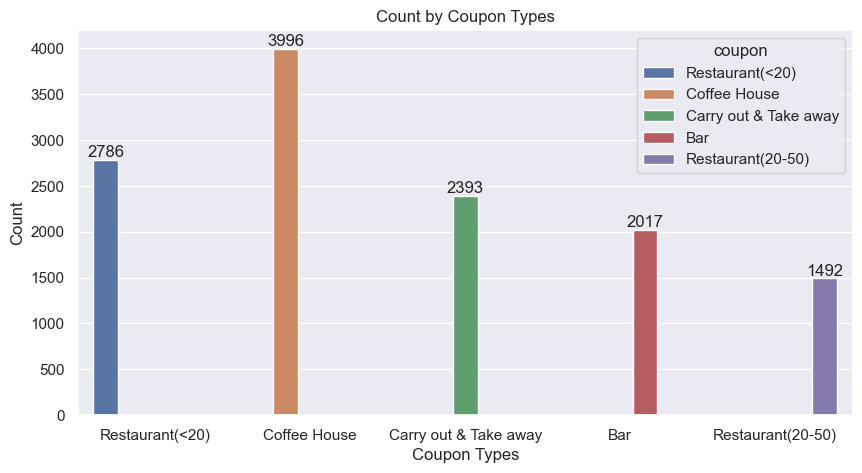

In [69]:
sns.set(rc={"figure.figsize":(10, 5)})
fig = sns.countplot(x="coupon", hue='coupon', data=data)
for container in fig.containers:
    fig.bar_label(container)

plt.xlabel("Coupon Types")
plt.ylabel("Count")
plt.title("Count by Coupon Types")
plt.show(fig)

6. Use a histogram to visualize the temperature column.

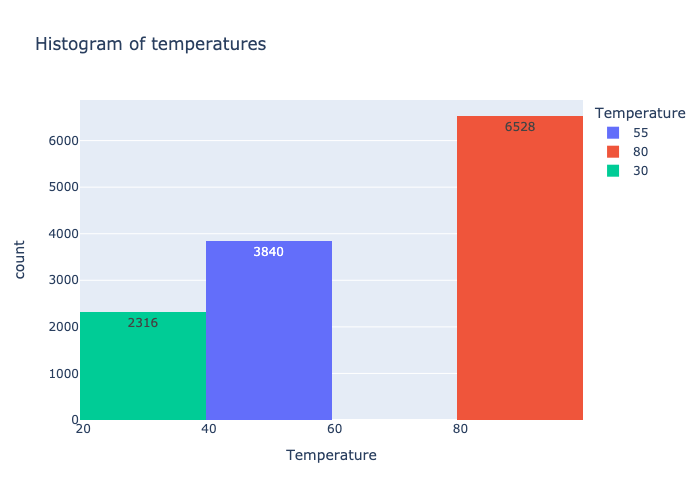

In [70]:
fig = px.histogram(data, x='temperature', title="Histogram of temperatures", labels={'temperature':'Temperature'},
                   color='temperature', text_auto=True)
fig.show('png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [71]:
data_bar = data[data["coupon"]=='Bar']
data_bar.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
11633,Work,Alone,Snowy,30,7AM,Bar,1d,Male,41,Married partner,1,Some college - no degree,Business & Financial,$100000 or More,Mazda5,less1,less1,1~3,1~3,less1,1,1,1,0,1,1
7630,No Urgent Place,Partner,Sunny,30,10AM,Bar,1d,Male,50plus,Unmarried partner,1,Associates degree,Transportation & Material Moving,$50000 - $62499,Mazda5,never,1~3,4~8,4~8,1~3,1,1,0,0,1,0
7438,No Urgent Place,Kid(s),Rainy,55,10PM,Bar,1d,Female,50plus,Married partner,1,Bachelors degree,Sales & Related,$50000 - $62499,Mazda5,4~8,4~8,1~3,1~3,less1,1,1,0,0,1,0
6807,No Urgent Place,Partner,Snowy,30,2PM,Bar,1d,Male,26,Unmarried partner,0,Some college - no degree,Unemployed,$12500 - $24999,Mazda5,never,less1,1~3,4~8,less1,1,1,0,0,1,0
11977,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,1d,Female,21,Married partner,1,Bachelors degree,Unemployed,$37500 - $49999,Mazda5,never,less1,1~3,1~3,less1,1,0,0,0,1,0


2. What proportion of bar coupons were accepted?


In [89]:
# find out all the bar visits where Y = 1
cnp_acpt = (data_bar[data_bar.Y == 1].shape[0])/(data_bar.shape[0])*100
print(np.round(cnp_acpt,2), '% of the customers accepted the bar coupon.')

2017
41.0 % of the customers accepted the bar coupon.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


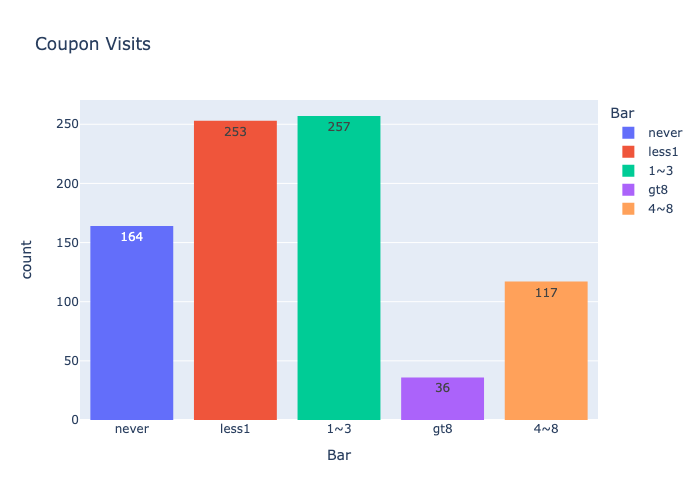

In [73]:
fig = px.histogram(data_bar[data_bar.Y==1], x='Bar', title="Coupon Visits", labels={'Bar':'Bar'},
                   color='Bar', text_auto=True)
fig.show('png')

In [74]:
# creating lists
less_than_3_vists_list = ["never","less1","1~3"]
more_than_3_visits_list = ["gt8","4~8"]
# performing queries (bar visits)
bar_lt_3_acpt = (data_bar[data_bar.Y == 1].query('Bar in @less_than_3_vists_list').shape[0])/(data_bar[data_bar.Y == 1].shape[0])*100
bar_gt_3_acpt = (data_bar[data_bar.Y == 1].query('Bar in @more_than_3_visits_list').shape[0])/(data_bar[data_bar.Y == 1].shape[0])*100

print(np.round(bar_lt_3_acpt,2),'% of the customers accepted the coupon and went to a bar 3 or fewer times a month.')
print(np.round(bar_gt_3_acpt,2),'% of the customers accepted the coupon and went to a bar more than 3 times in a month.')

81.5 % of the customers accepted the coupon and went to a bar 3 or fewer times a month.
18.5 % of the customers accepted the coupon and went to a bar more than 3 times in a month.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [75]:
# creating lists
agegt25_list = ['46','26','31','41','50plus','36']
bargt1_list = ['1~3','gt8','4~8']
# performing queries (age > 25 and bar > 1 visit)
data_bargt1_agegt25 = data_bar[data_bar.Y==1].query('age in @agegt25_list and Bar in @bargt1_list')
bargt1_agegt25_acpt = (data_bargt1_agegt25.shape[0])/(data_bar[data_bar.Y == 1].shape[0])*100

In [76]:
# customers who accepted the coupon, were over 25, went to bar less than once
agegt25_list = ['46','26','31','41','50plus','36']
bar_never_list = ['never','less1']
df1 = data_bar[data_bar.Y==1].query('age in @agegt25_list and Bar in @bar_never_list')

# customers who accepted the coupon, were under 25, went to bar less than once
agelt25_list = ['21','below21']
df2 = data_bar[data_bar.Y==1].query('age in @agelt25_list and Bar in @bar_never_list')

# customers who accepted the coupon, were under 25, went to bar more than once
bargt1_list = ['1~3','gt8','4~8']
df3 = data_bar[data_bar.Y==1].query('age in @agelt25_list and Bar in @bargt1_list')

# sum of all the "other" customers
barlt1_agelt25_acpt = (df1.shape[0]+df2.shape[0]+df3.shape[0])/(data_bar[data_bar.Y == 1].shape[0])*100

In [77]:
print(np.round(bargt1_agegt25_acpt,2),'% of customers who were over 25 and went to the bar more than once accepted the coupon')
print(np.round(barlt1_agelt25_acpt,2),'% of customers who were less than 25 years of age and never went to a bar accepted the coupon')

35.31 % of customers who were over 25 and went to the bar more than once accepted the coupon
64.69 % of customers who were less than 25 years of age and never went to a bar accepted the coupon


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [78]:
# creating lists
bargt1_list = ['1~3','gt8','4~8']
occupation_list = ['Farming Fishing & Forestry']

# performing queries for bar visits, occupation & passanger
data_bargt1_kgt0_oc = data_bar[data_bar.Y==1].query('Bar in @bargt1_list and occupation not in @occupation_list and passanger != "Kid(s)"')
bargt1_kgt0_oc_acpt = (data_bargt1_kgt0_oc.shape[0])/(data_bar[data_bar.Y == 1].shape[0])*100

print(np.round(bargt1_kgt0_oc_acpt,2),'% of customers, who went to a bar & had occupations other than farming & had passengers who were not kids.')
print(np.round(100-bargt1_kgt0_oc_acpt,2), '% of all other customers.')

47.52 % of customers, who went to a bar & had occupations other than farming & had passengers who were not kids.
52.48 % of all other customers.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

In [79]:
# use query in
bargt1_list = ['1~3','gt8','4~8']
passanger_nk_list = ['Alone','Friend(s)','Partner']
maritalStatus_list = ['Unmarried partner','Single','Married partner','Divorced']
df1 = data_bar[data_bar.Y==1].query('Bar in @bargt1_list and passanger in @passanger_nk_list and maritalStatus in @maritalStatus_list')
df1_acpt = (df1.shape[0])/(data_bar[data_bar.Y == 1].shape[0])*100
df2 = data_bar[data_bar.Y==1].query('Bar in @bargt1_list and age in ["21","26","below21"]')
df2_acpt = (df2.shape[0])/(data_bar[data_bar.Y == 1].shape[0])*100
df3 = data_bar[data_bar.Y==1].query('RestaurantLessThan20 in ["gt8","4~8"] and income in ["$37500 - $49999","$12500 - $24999","$25000 - $37499","Less than $12500"]')
df3_acpt = (df3.shape[0])/(data_bar[data_bar.Y == 1].shape[0])*100

print(np.round(df1_acpt,2),"% of customers who go to bars more than once, who have no kids and were not widowed")
print(np.round(df2_acpt,2),"% of customers who go to bars more than once, and are under the age of 30")
print(np.round(df3_acpt,2),"% of customers who go to cheap restaurants more than 4 times a month and have income less than 50k")

47.52 % of customers who go to bars more than once, who have no kids and were not widowed
30.11 % of customers who go to bars more than once, and are under the age of 30
18.86 % of customers who go to cheap restaurants more than 4 times a month and have income less than 50k


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Drivers most likely to accept a bar coupon
- have been atleast once to a bar.
- have no kid passangers.
- are over the age of 30.

### Independent Investigation - Carry out & Take away Coupons

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [81]:
data_carryout = data[data["coupon"]=='Carry out & Take away']
data_carryout.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
8288,Home,Alone,Sunny,30,6PM,Carry out & Take away,2h,Male,21,Single,0,Associates degree,Computer & Mathematical,$37500 - $49999,Car that is too old to install Onstar :D,never,less1,1~3,less1,less1,1,1,0,1,0,1
8700,No Urgent Place,Friend(s),Snowy,30,10PM,Carry out & Take away,1d,Male,31,Married partner,0,Graduate degree (Masters or Doctorate),Business & Financial,$75000 - $87499,Mazda5,1~3,4~8,less1,4~8,less1,1,1,0,0,1,1
5849,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,50plus,Single,0,Graduate degree (Masters or Doctorate),Arts Design Entertainment Sports & Media,$37500 - $49999,Mazda5,1~3,4~8,4~8,4~8,1~3,1,0,0,1,0,1
9278,Home,Alone,Sunny,80,6PM,Carry out & Take away,1d,Female,26,Unmarried partner,0,High School Graduate,Healthcare Support,$25000 - $37499,Mazda5,less1,less1,1~3,1~3,1~3,1,0,0,0,1,1
8534,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Female,21,Married partner,1,Some college - no degree,Student,$12500 - $24999,Mazda5,1~3,1~3,4~8,4~8,never,1,1,0,0,1,0


In [82]:
data_carryout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2393 entries, 2 to 12680
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2393 non-null   object
 1   passanger             2393 non-null   object
 2   weather               2393 non-null   object
 3   temperature           2393 non-null   int64 
 4   time                  2393 non-null   object
 5   coupon                2393 non-null   object
 6   expiration            2393 non-null   object
 7   gender                2393 non-null   object
 8   age                   2393 non-null   object
 9   maritalStatus         2393 non-null   object
 10  has_children          2393 non-null   int64 
 11  education             2393 non-null   object
 12  occupation            2393 non-null   object
 13  income                2393 non-null   object
 14  car                   2393 non-null   object
 15  Bar                   2393 non-null  

1 - What proportion of carryout coupons were accepted?

In [151]:
# find out all the carryout visits where Y = 1
carryout_acpt = (data_carryout[data_carryout.Y == 1].shape[0])/(data_carryout.shape[0])*100
print(np.round(carryout_acpt,2), '% of the customers accepted the carryout coupon.')

73.55 % of the customers accepted the carryout coupon.


2 - Compare acceptance rate of customers who do a carry out more than 4 times in a month to others

In [112]:
# creating lists
carry_list = ['gt8','4~8']

# performing queries for customers who do a take out more than 4 times in a month
data_carrygt4 = data_carryout[data_carryout.Y==1].query('CarryAway in @carry_list')
carrygt4_acpt = (data_carrygt4.shape[0])/(data_carryout[data_carryout.Y == 1].shape[0])*100

print(np.round(carrygt4_acpt,2), '% of the customers took a carryout more than 4 times in a month.')
print(np.round(100-carrygt4_acpt,2), '% of all other customers who do a carryout.')

47.78 % of the customers took a carryout more than 4 times in a month.
52.22 % of all other customers who do a carryout.


3 - Compare acceptance rate of customers who do a carry out more than 4 times in a month and are driving alone

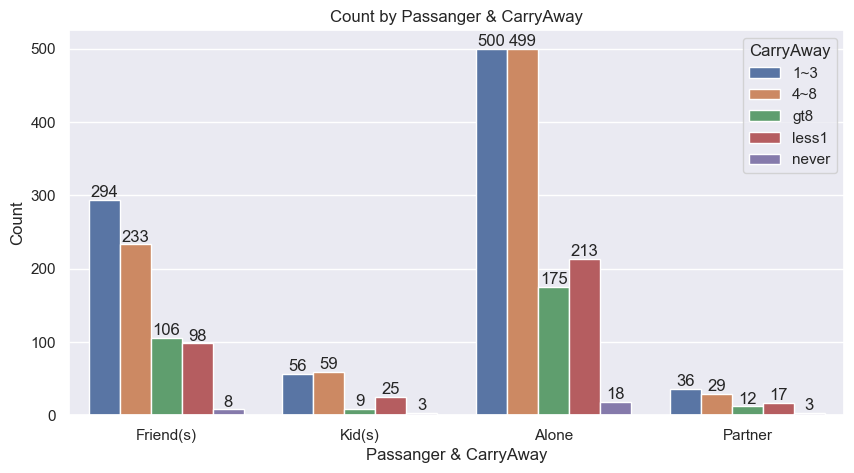

In [115]:
sns.set(rc={"figure.figsize":(10, 5)})
fig = sns.countplot(x="passanger", hue='CarryAway', data=data_carryout)
for container in fig.containers:
    fig.bar_label(container)

plt.xlabel("Passanger & CarryAway")
plt.ylabel("Count")
plt.title("Count by Passanger & CarryAway")
plt.show(fig)

In [134]:
# creating lists
carrygt4_list = ['gt8','4~8']
passanger_list = ['Alone']
carrylt4_list = ['1~3','less1','never']

# performing queries for customers who do a take out more than 4 times in a month & are driving alone
data_carrygt4_alone = data_carryout[data_carryout.Y==1].query('CarryAway in @carrygt4_list and passanger in @passanger_list')
data_carrylt4_alone = data_carryout[data_carryout.Y==1].query('CarryAway in @carrylt4_list and passanger in @passanger_list')
carrygt4_alone_acpt = (data_carrygt4_alone.shape[0])/(data_carryout[data_carryout.Y == 1].shape[0])*100
carrylt4_alone_acpt = (data_carrylt4_alone.shape[0])/(data_carryout[data_carryout.Y == 1].shape[0])*100

print(np.round(carrygt4_alone_acpt,2), '% of the customers took a carryout more than 4 times in a month & drove alone')
print(np.round(carrylt4_alone_acpt,2), '% of the customers took a carryout less than 4 times in a month & drove alone')


28.52 % of the customers took a carryout more than 4 times in a month & drove alone
29.55 % of the customers took a carryout less than 4 times in a month & drove alone


4 - Acceptance rate between drivers who drive to work in the morning (before noon) and drivers going home in the evening.

In [149]:
# creating lists
dest_wk_list = ['Work']
dest_home_list = ['Home']
time_am_list = ['7AM','10AM']
time_pm_list = ['2PM','6PM','10PM']

# performing queries for customers who do a take out more than 4 times in a month & are driving alone
data_wk_am = data_carryout[data_carryout.Y==1].query('destination in @dest_wk_list and time in @time_am_list')
wk_am_acpt = (data_wk_am.shape[0])/(data_carryout[data_carryout.Y == 1].shape[0])*100

data_home_pm = data_carryout[data_carryout.Y==1].query('destination in @dest_home_list and time in @time_pm_list')
home_pm_acpt = (data_home_pm.shape[0])/(data_carryout[data_carryout.Y == 1].shape[0])*100

print(np.round(wk_am_acpt,2), '% of the customers accepted a carryon coupon while driving to work before noon.')
print(np.round(home_pm_acpt,2), '% of the customers accepted a carryon coupon while driving to home in the evening.')

28.35 % of the customers accepted a carryon coupon while driving to work before noon.
29.26 % of the customers accepted a carryon coupon while driving to home in the evening.


5 - Visualization of drivers by gender & marital status.

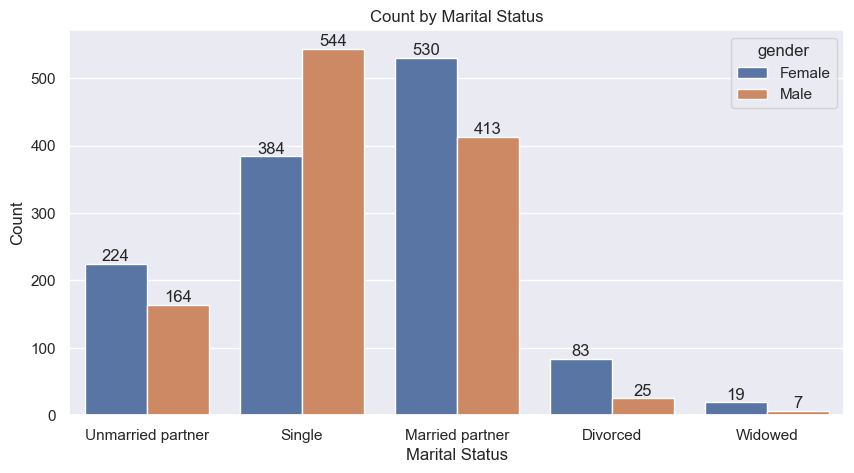

In [103]:
sns.set(rc={"figure.figsize":(10, 5)})
fig = sns.countplot(x="maritalStatus", hue='gender', data=data_carryout)
for container in fig.containers:
    fig.bar_label(container)

plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Count by Marital Status")
plt.show(fig)

6 - Hypothesize about drivers who accepted the carry out & takeaway coupons

### Drivers most likely to accept a carry out coupon
- have taken a carry out atleast once in a month
- drivers who drive alone with no passengers 
- are the ones who typically drive to work & back home.